In [206]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

In [207]:
df=pd.read_csv('fraud_detection_dataset.csv')
pd.set_option('display.max_columns', None)
df

,Transaction_ID,Customer_ID,Transaction_Amount,Transaction_Date,Merchant_ID,Merchant_Category,Card_Type,Is_Online,Is_Fraud,Customer_Age,Customer_Gender,Customer_Income,Transaction_City,Device_Type,Is_International
0,T0001,C001,1878.955193,2022-01-01 00:00:00,M001,Entertainment,Credit,0.0,0.0,59.0,Male,NaN,NaN,Mobile,0.0
1,T0002,C002,4754.064389,2022-01-02 00:00:00,NaN,Clothing,Debit,0.0,0.0,66.0,Male,106204.26510,Houston,NaN,1.0
2,T0003,C003,3662.649770,2022-01-03 00:00:00,M003,Electronics,Prepaid,0.0,0.0,NaN,Female,104454.93990,Chicago,Tablet,0.0
3,T0004,C004,2997.305836,2022-01-04 00:00:00,M004,Entertainment,Credit,0.0,0.0,48.0,Male,51910.04732,New York,Tablet,0.0
4,T0005,NaN,788.533016,2022-01-05 00:00:00,M005,NaN,Credit,0.0,0.0,NaN,Female,102891.54740,Phoenix,Tablet,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,T0196,C046,1752.555777,2022-07-15 00:00:00,NaN,Clothing,Debit,1.0,NaN,63.0,Female,115086.35620,Los Angeles,Mobile,0.0
196,T0197,NaN,NaN,2022-07-16 00:00:00,M017,NaN,Credit,0.0,0.0,40.0,NaN,35105.78918,Chicago,Tablet,NaN
197,T0198,C048,NaN,2022-07-17 00:00:00,M018,Entertainment,NaN,0.0,1.0,49.0,Male,63233.48010,Phoenix,Tablet,0.0
198,T0199,NaN,4436.561257,2022-07-18 00:00:00,M019,Clothing,Prepaid,0.0,0.0,34.0,Male,114361.59200,Phoenix,Tablet,0.0


The following function will show me the top 5 rows in the dataset

In [208]:
df.head()

,Transaction_ID,Customer_ID,Transaction_Amount,Transaction_Date,Merchant_ID,Merchant_Category,Card_Type,Is_Online,Is_Fraud,Customer_Age,Customer_Gender,Customer_Income,Transaction_City,Device_Type,Is_International
0,T0001,C001,1878.955193,2022-01-01 00:00:00,M001,Entertainment,Credit,0.0,0.0,59.0,Male,NaN,NaN,Mobile,0.0
1,T0002,C002,4754.064389,2022-01-02 00:00:00,NaN,Clothing,Debit,0.0,0.0,66.0,Male,106204.26510,Houston,NaN,1.0
2,T0003,C003,3662.649770,2022-01-03 00:00:00,M003,Electronics,Prepaid,0.0,0.0,NaN,Female,104454.93990,Chicago,Tablet,0.0
3,T0004,C004,2997.305836,2022-01-04 00:00:00,M004,Entertainment,Credit,0.0,0.0,48.0,Male,51910.04732,New York,Tablet,0.0
4,T0005,NaN,788.533016,2022-01-05 00:00:00,M005,NaN,Credit,0.0,0.0,NaN,Female,102891.54740,Phoenix,Tablet,0.0


The following function will show me the last 5 rows in the dataset

In [209]:
df.tail()

,Transaction_ID,Customer_ID,Transaction_Amount,Transaction_Date,Merchant_ID,Merchant_Category,Card_Type,Is_Online,Is_Fraud,Customer_Age,Customer_Gender,Customer_Income,Transaction_City,Device_Type,Is_International
195,T0196,C046,1752.555777,2022-07-15 00:00:00,NaN,Clothing,Debit,1.0,NaN,63.0,Female,115086.35620,Los Angeles,Mobile,0.0
196,T0197,NaN,NaN,2022-07-16 00:00:00,M017,NaN,Credit,0.0,0.0,40.0,NaN,35105.78918,Chicago,Tablet,NaN
197,T0198,C048,NaN,2022-07-17 00:00:00,M018,Entertainment,NaN,0.0,1.0,49.0,Male,63233.48010,Phoenix,Tablet,0.0
198,T0199,NaN,4436.561257,2022-07-18 00:00:00,M019,Clothing,Prepaid,0.0,0.0,34.0,Male,114361.59200,Phoenix,Tablet,0.0
199,T0200,C050,NaN,2022-07-19 00:00:00,M020,Electronics,NaN,0.0,0.0,67.0,Male,61972.73169,New York,Tablet,0.0


In [210]:
df.shape

(200, 15)

I will now transform the column Transaction_Date into datetime

In [211]:
from datetime import datetime

In [212]:
df['Transaction_Date']=pd.to_datetime(df['Transaction_Date'])

In [277]:
df = df.set_index('Transaction_Date')

In [278]:
df

,Transaction_ID,Customer_ID,Transaction_Amount,Merchant_ID,Merchant_Category,Card_Type,Is_Online,Is_Fraud,Customer_Age,Customer_Gender,Customer_Income,Transaction_City,Device_Type,Is_International
Transaction_Date,,,,,,,,,,,,,,
2022-01-01,T0001,C001,1878.955193,M001,Entertainment,Credit,0.0,0.0,59.000000,Male,72922.29116,nan,Mobile,0.0
2022-01-02,T0002,C002,4754.064389,nan,Clothing,Debit,0.0,0.0,66.000000,Male,106204.26510,Houston,nan,1.0
2022-01-03,T0003,C003,3662.649770,M003,Electronics,Prepaid,0.0,0.0,44.877778,Female,104454.93990,Chicago,Tablet,0.0
2022-01-04,T0004,C004,2997.305836,M004,Entertainment,Credit,0.0,0.0,48.000000,Male,51910.04732,New York,Tablet,0.0
2022-01-05,T0005,nan,788.533016,M005,nan,Credit,0.0,0.0,44.877778,Female,102891.54740,Phoenix,Tablet,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-13,T0194,nan,3169.176272,nan,Travel,Debit,1.0,0.0,44.877778,Male,85451.12143,New York,Tablet,0.0
2022-07-14,T0195,C045,1701.758657,nan,Clothing,Debit,0.0,0.0,47.000000,Female,47325.95270,nan,nan,0.0
2022-07-17,T0198,C048,2483.627917,M018,Entertainment,nan,0.0,1.0,49.000000,Male,63233.48010,Phoenix,Tablet,0.0


I want to visualize the first and last day of transactions to better understand my dataset.

To do so I will create a line plot connecting the first and last day of transactions. 

First Transaction Date: 2022-01-01 00:00:00
Last Transaction Date: 2022-07-19 00:00:00


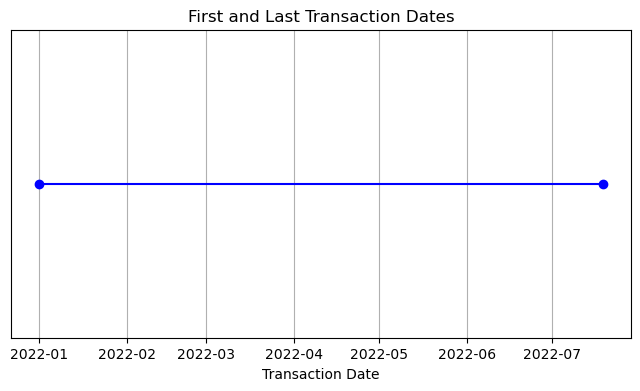

In [280]:
first_day = df.index.min()
last_day = df.index.max()
print(f"First Transaction Date: {first_day}")
print(f"Last Transaction Date: {last_day}")
plt.figure(figsize=(8, 4))
plt.plot([first_day, last_day], [0, 0], marker='o', linestyle='-', color='blue')
plt.yticks([])  
plt.xlabel('Transaction Date')
plt.title('First and Last Transaction Dates')
plt.grid(True)
plt.show()

Now I can see that the first transaction was on 01/01/20222 and the last day was on 19/07/2022

## Dataframe Atributes

### Characterisation of the data set:

### Lets now visualize the data types of each column and any missing values

I will now inspect the data types of the columns

In [281]:
print(df.dtypes)

Transaction_ID         object
Customer_ID            object
Transaction_Amount    float64
Merchant_ID            object
Merchant_Category      object
Card_Type              object
Is_Online             float64
Is_Fraud              float64
Customer_Age          float64
Customer_Gender        object
Customer_Income       float64
Transaction_City       object
Device_Type            object
Is_International      float64
dtype: object


In [282]:
df.dtypes.value_counts()

object     8
float64    6
Name: count, dtype: int64

Checking the shape of the dataframe

The following function, will display the number of rows (200) and the number of columns (15)

In [283]:
print('Shape of DataFrame (Observations and Rows) = ', df.shape)

Shape of DataFrame (Observations and Rows) =  (142, 14)


Now I will see the column names

In [284]:
df.columns

Index(['Transaction_ID', 'Customer_ID', 'Transaction_Amount', 'Merchant_ID',
       'Merchant_Category', 'Card_Type', 'Is_Online', 'Is_Fraud',
       'Customer_Age', 'Customer_Gender', 'Customer_Income',
       'Transaction_City', 'Device_Type', 'Is_International'],
      dtype='object')

In [285]:
values = df.values
values

array([['T0001', 'C001', 1878.955193, ..., 'nan', 'Mobile', 0.0],
       ['T0002', 'C002', 4754.064389, ..., 'Houston', 'nan', 1.0],
       ['T0003', 'C003', 3662.64977, ..., 'Chicago', 'Tablet', 0.0],
       ...,
       ['T0198', 'C048', 2483.627917144753, ..., 'Phoenix', 'Tablet',
        0.0],
       ['T0199', 'nan', 4436.561257, ..., 'Phoenix', 'Tablet', 0.0],
       ['T0200', 'C050', 2483.627917144753, ..., 'New York', 'Tablet',
        0.0]], dtype=object)

### Number of distinct values in each feature

Lets now visualize the number of distinct values in each feature

In [286]:
for col in df.columns:
    print(col, ': Number of Distinct Values: ', len(df[col].unique()))

Transaction_ID : Number of Distinct Values:  142
Customer_ID : Number of Distinct Values:  50
Transaction_Amount : Number of Distinct Values:  119
Merchant_ID : Number of Distinct Values:  31
Merchant_Category : Number of Distinct Values:  6
Card_Type : Number of Distinct Values:  4
Is_Online : Number of Distinct Values:  2
Is_Fraud : Number of Distinct Values:  2
Customer_Age : Number of Distinct Values:  47
Customer_Gender : Number of Distinct Values:  3
Customer_Income : Number of Distinct Values:  130
Transaction_City : Number of Distinct Values:  6
Device_Type : Number of Distinct Values:  4
Is_International : Number of Distinct Values:  2


Print the distinct values in each feature

In [287]:
for col in df:
    print('COLUMN NAME: ', col,':')
    print(df[col].unique())
    print('\n')

COLUMN NAME:  Transaction_ID :
['T0001' 'T0002' 'T0003' 'T0004' 'T0005' 'T0007' 'T0008' 'T0009' 'T0010'
 'T0011' 'T0012' 'T0013' 'T0015' 'T0016' 'T0018' 'T0019' 'T0020' 'T0021'
 'T0022' 'T0023' 'T0025' 'T0026' 'T0027' 'T0028' 'T0029' 'T0032' 'T0035'
 'T0036' 'T0038' 'T0039' 'T0040' 'T0041' 'T0042' 'T0044' 'T0045' 'T0046'
 'T0048' 'T0050' 'T0053' 'T0056' 'T0057' 'T0058' 'T0059' 'T0060' 'T0061'
 'T0062' 'T0063' 'T0064' 'T0066' 'T0067' 'T0069' 'T0071' 'T0072' 'T0074'
 'T0076' 'T0077' 'T0078' 'T0080' 'T0081' 'T0083' 'T0084' 'T0086' 'T0087'
 'T0088' 'T0089' 'T0090' 'T0092' 'T0093' 'T0094' 'T0095' 'T0098' 'T0099'
 'T0100' 'T0102' 'T0105' 'T0106' 'T0107' 'T0108' 'T0109' 'T0112' 'T0113'
 'T0115' 'T0116' 'T0118' 'T0119' 'T0120' 'T0122' 'T0123' 'T0124' 'T0125'
 'T0126' 'T0127' 'T0128' 'T0130' 'T0131' 'T0132' 'T0135' 'T0137' 'T0142'
 'T0143' 'T0144' 'T0146' 'T0148' 'T0150' 'T0153' 'T0154' 'T0155' 'T0156'
 'T0157' 'T0159' 'T0160' 'T0162' 'T0163' 'T0164' 'T0165' 'T0166' 'T0167'
 'T0168' 'T0170' 'T0

I will now look for duplicate rows

In [288]:
df.count()

Transaction_ID        142
Customer_ID           142
Transaction_Amount    142
Merchant_ID           142
Merchant_Category     142
Card_Type             142
Is_Online             142
Is_Fraud              142
Customer_Age          142
Customer_Gender       142
Customer_Income       142
Transaction_City      142
Device_Type           142
Is_International      142
dtype: int64

In [289]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 14)


In [290]:
df.duplicated().sum()

0

There is no duplicate data

The following function will give me a summary of statistics pertaining to the float columns and calculate the 5 number summary giving me the Mean, Standard Deviation, 1st Quartile: 25%, 3rd Quartile: 75%, Minimum: Smallest Observation in the Sample and Maximum: Largest Observation in the sample.

I will now call the .describe() function to quickly analyse the summary statistics for the numerical features.

In [291]:
df.describe()

,Transaction_Amount,Is_Online,Is_Fraud,Customer_Age,Customer_Income,Is_International
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,2482.787800,0.485915,0.098592,44.098044,73056.583613,0.105634
std,1328.895452,0.501571,0.299168,14.295447,28415.958026,0.308456
min,92.773266,0.000000,0.000000,18.000000,20638.587170,0.000000
25%,1298.174569,0.000000,0.000000,35.000000,47675.439318,0.000000
50%,2483.627917,0.000000,0.000000,44.877778,73823.285765,0.000000
75%,3416.003643,1.000000,0.000000,54.000000,96564.819230,0.000000
max,4928.395766,1.000000,1.000000,69.000000,119712.450000,1.000000


In [292]:
df.describe(include=object)

,Transaction_ID,Customer_ID,Merchant_ID,Merchant_Category,Card_Type,Customer_Gender,Transaction_City,Device_Type
count,142,142,142,142,142,142,142,142
unique,142,50,31,6,4,3,6,4
top,T0001,nan,nan,Electronics,Credit,Male,New York,Mobile
freq,1,30,29,29,48,77,33,46


In [293]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction_Amount,142.0,2482.787800,1328.895452,92.773266,1298.174569,2483.627917,3416.003643,4928.395766
Is_Online,142.0,0.485915,0.501571,0.000000,0.000000,0.000000,1.000000,1.000000
Is_Fraud,142.0,0.098592,0.299168,0.000000,0.000000,0.000000,0.000000,1.000000
Customer_Age,142.0,44.098044,14.295447,18.000000,35.000000,44.877778,54.000000,69.000000
Customer_Income,142.0,73056.583613,28415.958026,20638.587170,47675.439318,73823.285765,96564.819230,119712.450000
Is_International,142.0,0.105634,0.308456,0.000000,0.000000,0.000000,0.000000,1.000000


In [294]:
print('length of data is', len(df))

length of data is 142


In [295]:
numerical_summary = df.describe().transpose()

palette = sns.color_palette("viridis", as_cmap=True)

numerical_summary.style.background_gradient(cmap=palette)

,count,mean,std,min,25%,50%,75%,max
Transaction_Amount,142.000000,2482.787800,1328.895452,92.773266,1298.174569,2483.627917,3416.003643,4928.395766
Is_Online,142.000000,0.485915,0.501571,0.000000,0.000000,0.000000,1.000000,1.000000
Is_Fraud,142.000000,0.098592,0.299168,0.000000,0.000000,0.000000,0.000000,1.000000
Customer_Age,142.000000,44.098044,14.295447,18.000000,35.000000,44.877778,54.000000,69.000000
Customer_Income,142.000000,73056.583613,28415.958026,20638.587170,47675.439318,73823.285765,96564.819230,119712.450000
Is_International,142.000000,0.105634,0.308456,0.000000,0.000000,0.000000,0.000000,1.000000


### Categorical and numerical data analysis

I will visualize how many Qualitative features are there in the dataset

In [296]:
qualitative=[feature for feature in df.columns if len(df[feature].unique())<=10]
qualitative

['Merchant_Category',
 'Card_Type',
 'Is_Online',
 'Is_Fraud',
 'Customer_Gender',
 'Transaction_City',
 'Device_Type',
 'Is_International']

In [297]:
for feature in qualitative:
    print(feature)
    print(df[feature].unique())

Merchant_Category
['Entertainment' 'Clothing' 'Electronics' 'nan' 'Groceries' 'Travel']
Card_Type
['Credit' 'Debit' 'Prepaid' 'nan']
Is_Online
[0. 1.]
Is_Fraud
[0. 1.]
Customer_Gender
['Male' 'Female' 'nan']
Transaction_City
['nan' 'Houston' 'Chicago' 'New York' 'Phoenix' 'Los Angeles']
Device_Type
['Mobile' 'nan' 'Tablet' 'Desktop']
Is_International
[0. 1.]


Lets now visualize the relationship between the qualitative features and Is_Fraud using a bar char

Merchant_Category


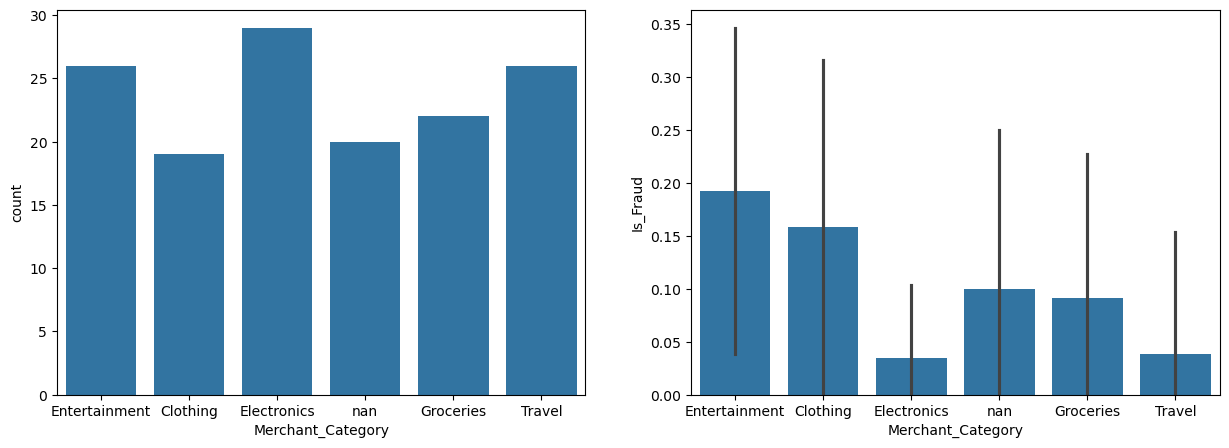

Card_Type


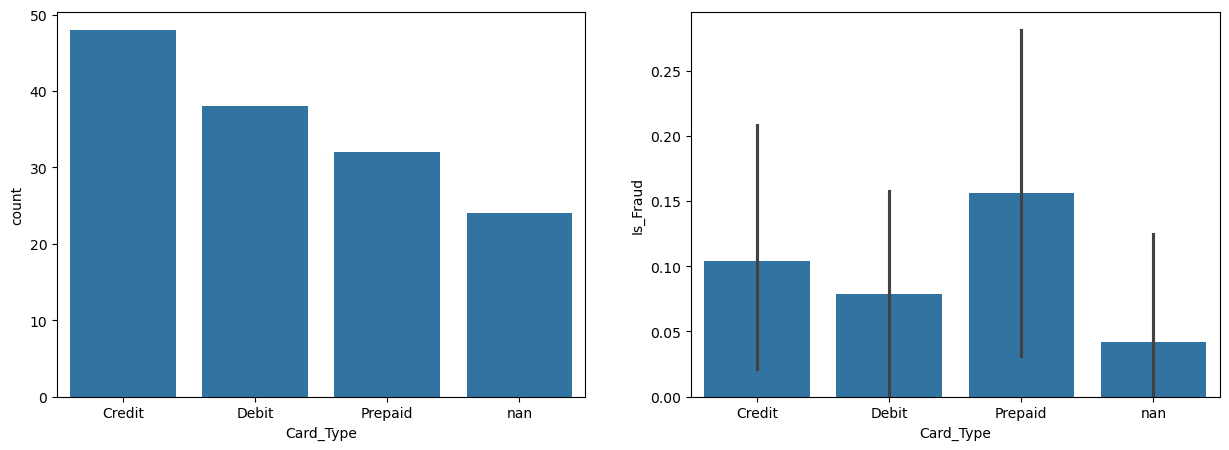

Is_Online


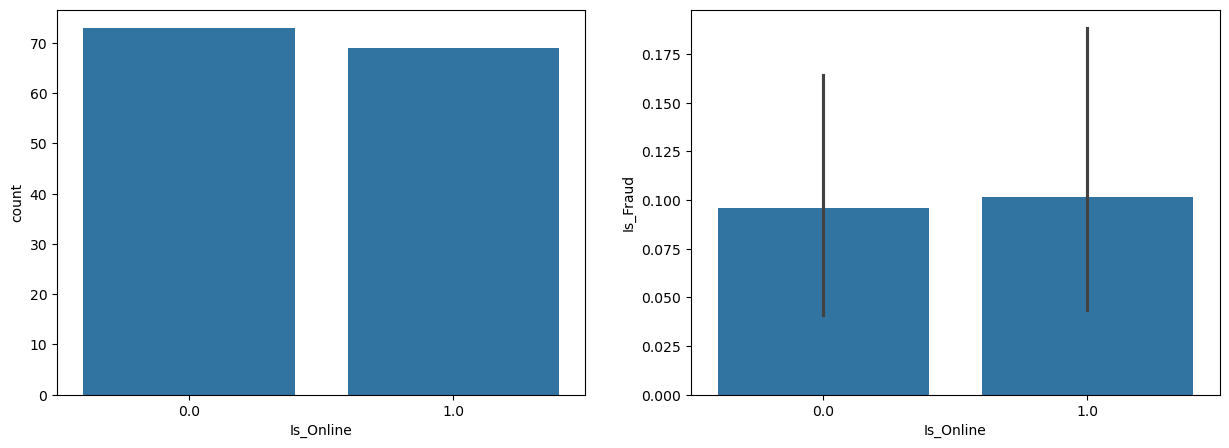

Is_Fraud


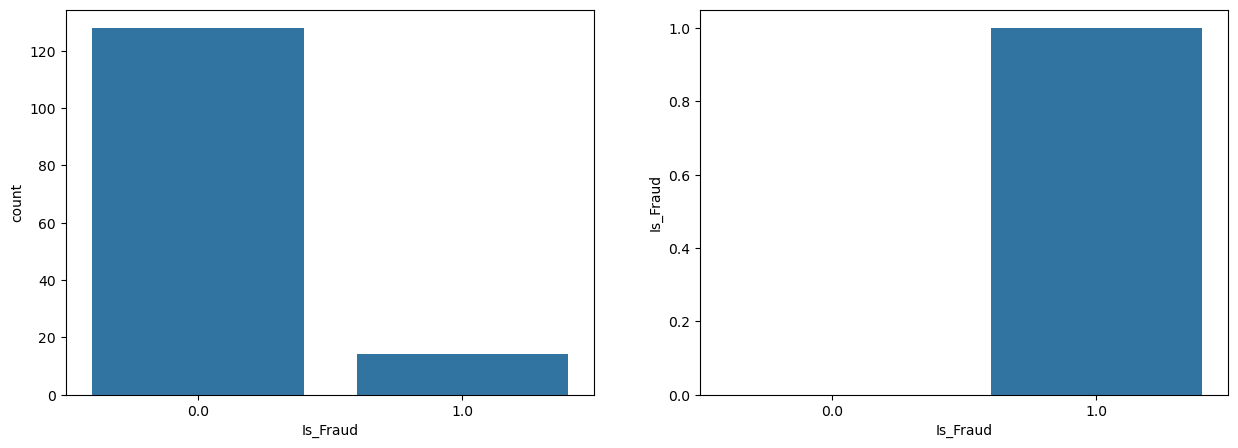

Customer_Gender


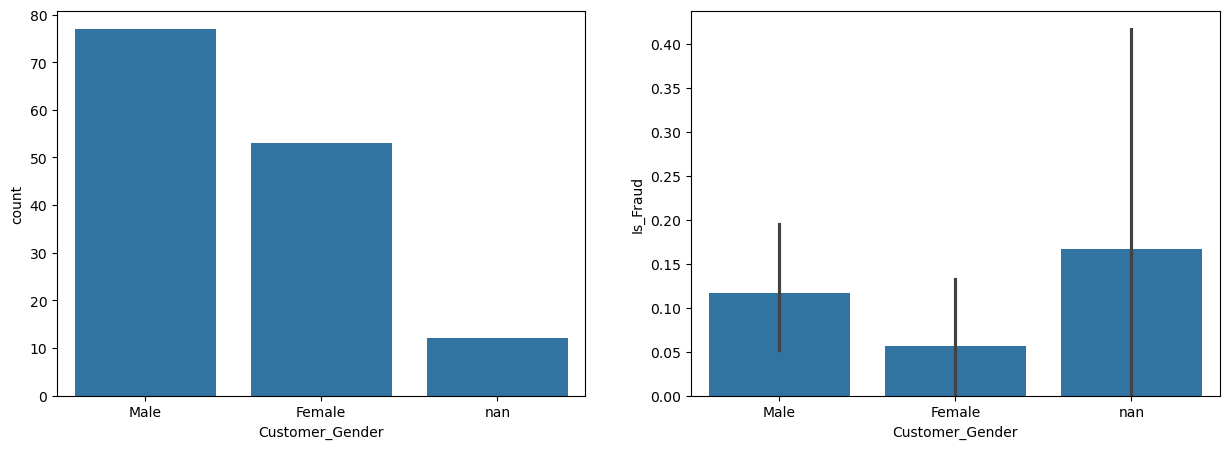

Transaction_City


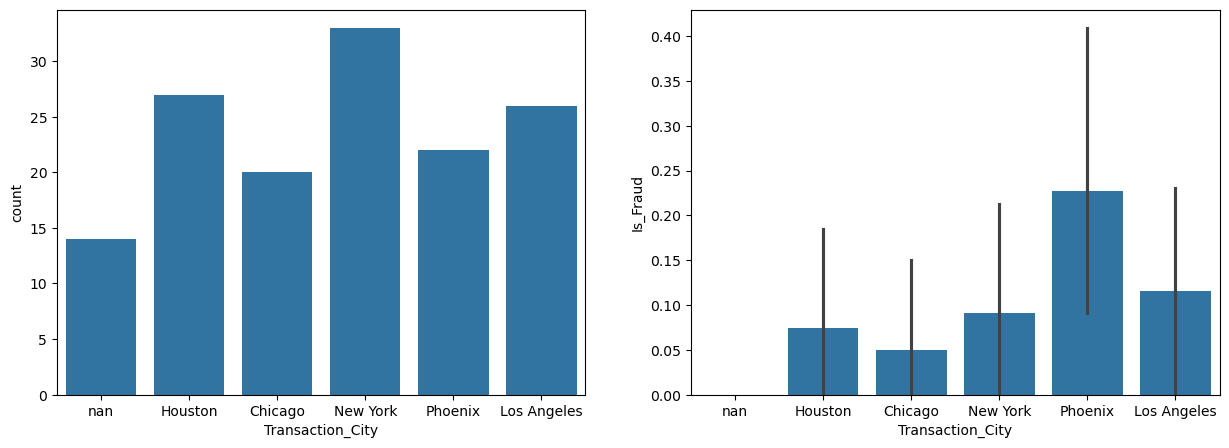

Device_Type


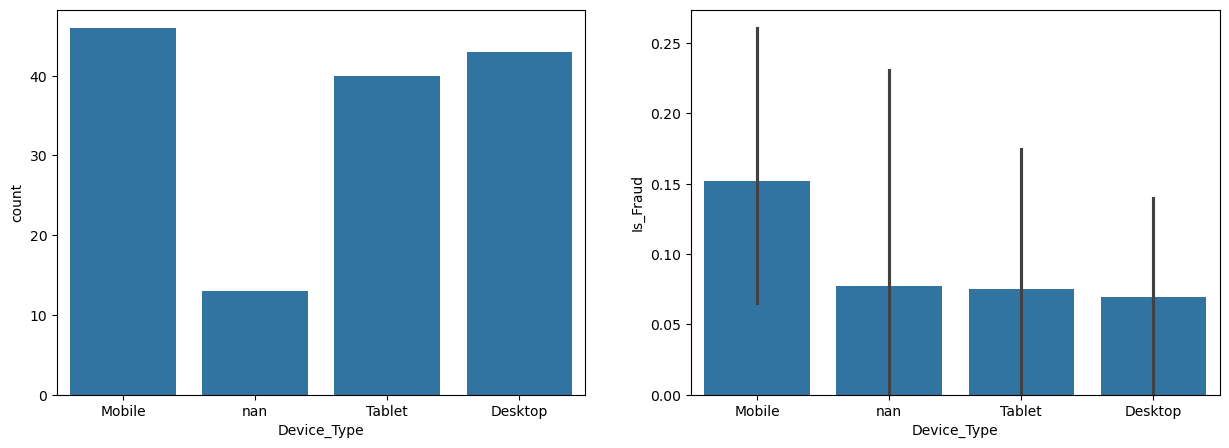

Is_International


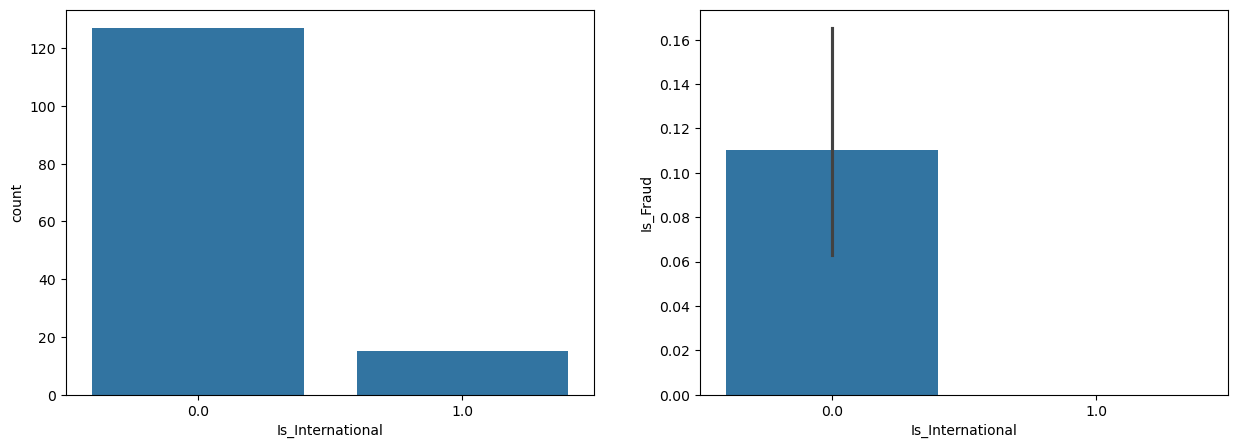

In [298]:
for feature in qualitative:
    print(feature)
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    sns.countplot(x=feature,data=df)
    plt.subplot(1, 2, 2)
    sns.barplot(x=feature,y='Is_Fraud',data=df)
    plt.show()

The following code tells me the amount of quantitative variables in the dataframe.

In [299]:
quantitative=[feature for feature in df.columns if df[feature].dtype!='O' and
             len(df[feature].unique())>10]
quantitative

['Transaction_Amount', 'Customer_Age', 'Customer_Income']

I will now use Histogram to visualize the distribution of quantitative features by using the function count in the quantitative columns

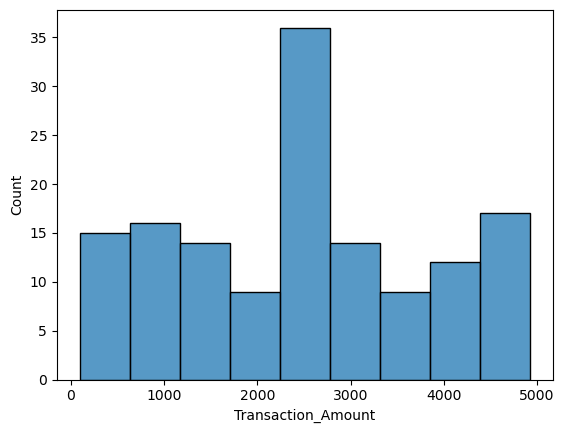

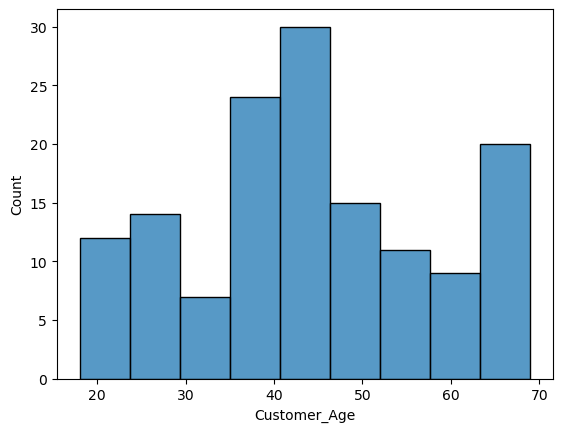

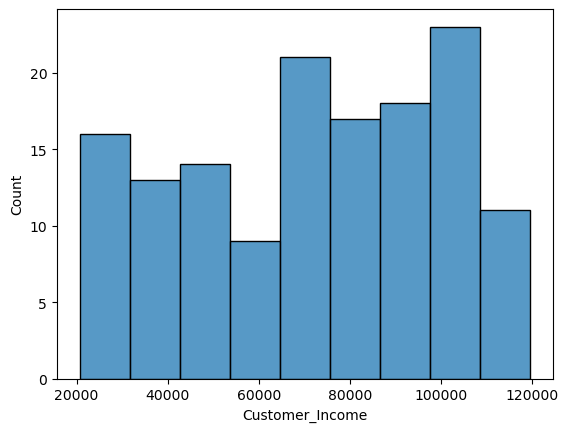

In [300]:
for feature in quantitative:
    sns.histplot(df[feature])
    plt.show()

I will now analyse the Descriptive Statistics for Numerical columns

In [301]:
numerical_cols = ['Transaction_Amount', 'Customer_Age', 'Customer_Income']
print("Descriptive Statistics for Numerical Columns:")
print(df[numerical_cols].describe())

Descriptive Statistics for Numerical Columns:
       Transaction_Amount  Customer_Age  Customer_Income
count          142.000000    142.000000       142.000000
mean          2482.787800     44.098044     73056.583613
std           1328.895452     14.295447     28415.958026
min             92.773266     18.000000     20638.587170
25%           1298.174569     35.000000     47675.439318
50%           2483.627917     44.877778     73823.285765
75%           3416.003643     54.000000     96564.819230
max           4928.395766     69.000000    119712.450000


In [302]:
numerical_cols

['Transaction_Amount', 'Customer_Age', 'Customer_Income']

The column Transaction amount, seems very interesting, so I will further investigate it.

In [303]:
df.Transaction_Amount.value_counts

<bound method IndexOpsMixin.value_counts of Transaction_Date
2022-01-01    1878.955193
2022-01-02    4754.064389
2022-01-03    3662.649770
2022-01-04    2997.305836
2022-01-05     788.533016
                 ...     
2022-07-13    3169.176272
2022-07-14    1701.758657
2022-07-17    2483.627917
2022-07-18    4436.561257
2022-07-19    2483.627917
Name: Transaction_Amount, Length: 142, dtype: float64>

The following function will calculate the median of Transaction_Amount column

In [304]:
average = df["Transaction_Amount"].median()
print(average)

2483.627917144753


The following function will calculate the mode of Transaction_Amount column

In [305]:
mode = df["Transaction_Amount"].mode()
print(mode)

0    2483.627917
Name: Transaction_Amount, dtype: float64


The following function will calculate the mean of Transaction_Amount column

In [306]:
middlePoint = df["Transaction_Amount"].mean()
print(middlePoint)

2482.787800438198


In [307]:
dispersion = df["Transaction_Amount"].std()
print(dispersion)

1328.8954521812996


I will define categorical cols as Categorical Columns and will continue to visualize its values

In [308]:
categorical_cols = ['Merchant_Category',
 'Card_Type',
 'Is_Online',
 'Is_Fraud',
 'Customer_Gender',
 'Transaction_City',
 'Device_Type',
 'Is_International']
print("\nValues for Categorical Columns:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print(f"Number of Unique Values: {df[col].nunique()}")
    print(f"Mode: {df[col].mode().tolist()}")


Values for Categorical Columns:

Merchant_Category:
Merchant_Category
Electronics      29
Entertainment    26
Travel           26
Groceries        22
nan              20
Clothing         19
Name: count, dtype: int64
Number of Unique Values: 6
Mode: ['Electronics']

Card_Type:
Card_Type
Credit     48
Debit      38
Prepaid    32
nan        24
Name: count, dtype: int64
Number of Unique Values: 4
Mode: ['Credit']

Is_Online:
Is_Online
0.0    73
1.0    69
Name: count, dtype: int64
Number of Unique Values: 2
Mode: [0.0]

Is_Fraud:
Is_Fraud
0.0    128
1.0     14
Name: count, dtype: int64
Number of Unique Values: 2
Mode: [0.0]

Customer_Gender:
Customer_Gender
Male      77
Female    53
nan       12
Name: count, dtype: int64
Number of Unique Values: 3
Mode: ['Male']

Transaction_City:
Transaction_City
New York       33
Houston        27
Los Angeles    26
Phoenix        22
Chicago        20
nan            14
Name: count, dtype: int64
Number of Unique Values: 6
Mode: ['New York']

Device_Type:
D

In [309]:
categorical_cols

['Merchant_Category',
 'Card_Type',
 'Is_Online',
 'Is_Fraud',
 'Customer_Gender',
 'Transaction_City',
 'Device_Type',
 'Is_International']

#### Check the different values in each feature.

To better understand each feature, I will now use df[col].unique in order to visualize every unique value in each column

In [310]:
for col in df:
    print('COLUMN NAME: ', col,':')
    print(df[col].unique())
    print('\n')

COLUMN NAME:  Transaction_ID :
['T0001' 'T0002' 'T0003' 'T0004' 'T0005' 'T0007' 'T0008' 'T0009' 'T0010'
 'T0011' 'T0012' 'T0013' 'T0015' 'T0016' 'T0018' 'T0019' 'T0020' 'T0021'
 'T0022' 'T0023' 'T0025' 'T0026' 'T0027' 'T0028' 'T0029' 'T0032' 'T0035'
 'T0036' 'T0038' 'T0039' 'T0040' 'T0041' 'T0042' 'T0044' 'T0045' 'T0046'
 'T0048' 'T0050' 'T0053' 'T0056' 'T0057' 'T0058' 'T0059' 'T0060' 'T0061'
 'T0062' 'T0063' 'T0064' 'T0066' 'T0067' 'T0069' 'T0071' 'T0072' 'T0074'
 'T0076' 'T0077' 'T0078' 'T0080' 'T0081' 'T0083' 'T0084' 'T0086' 'T0087'
 'T0088' 'T0089' 'T0090' 'T0092' 'T0093' 'T0094' 'T0095' 'T0098' 'T0099'
 'T0100' 'T0102' 'T0105' 'T0106' 'T0107' 'T0108' 'T0109' 'T0112' 'T0113'
 'T0115' 'T0116' 'T0118' 'T0119' 'T0120' 'T0122' 'T0123' 'T0124' 'T0125'
 'T0126' 'T0127' 'T0128' 'T0130' 'T0131' 'T0132' 'T0135' 'T0137' 'T0142'
 'T0143' 'T0144' 'T0146' 'T0148' 'T0150' 'T0153' 'T0154' 'T0155' 'T0156'
 'T0157' 'T0159' 'T0160' 'T0162' 'T0163' 'T0164' 'T0165' 'T0166' 'T0167'
 'T0168' 'T0170' 'T0

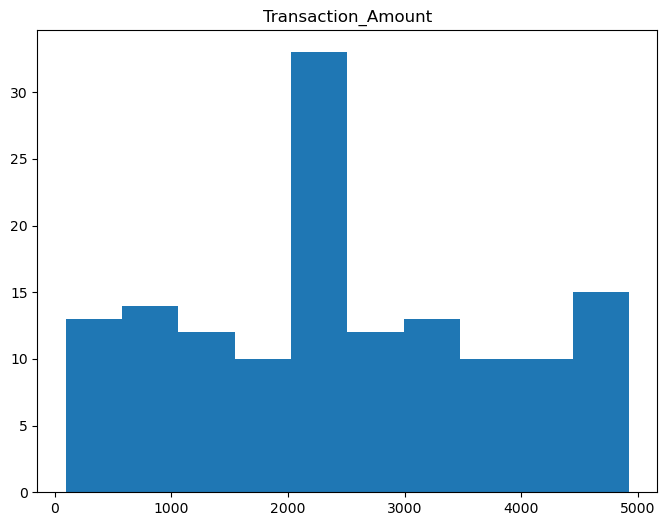

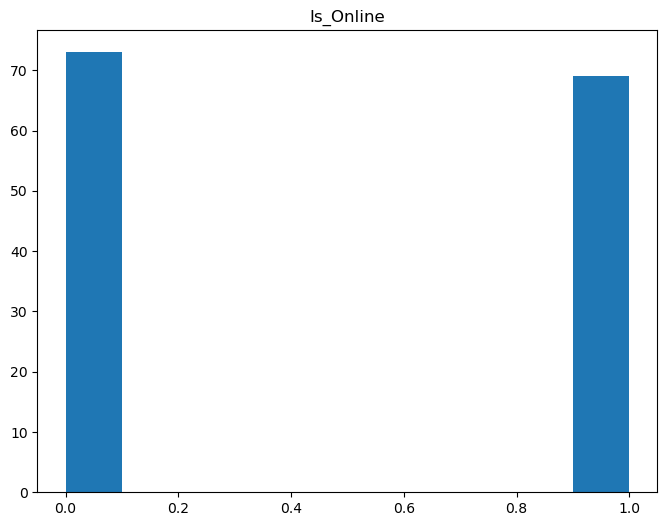

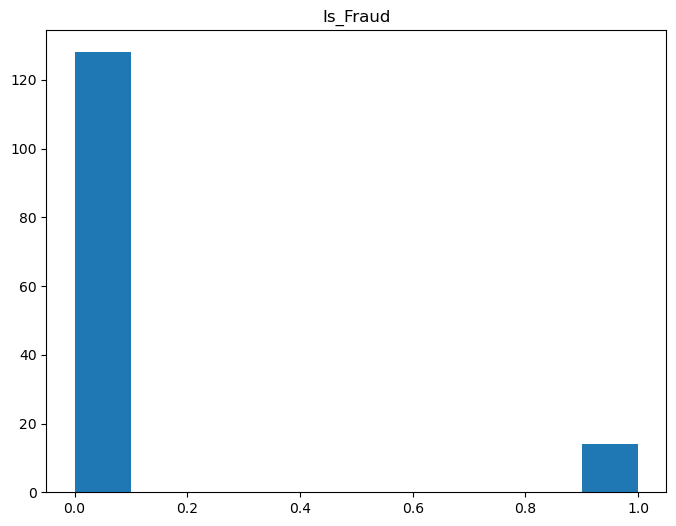

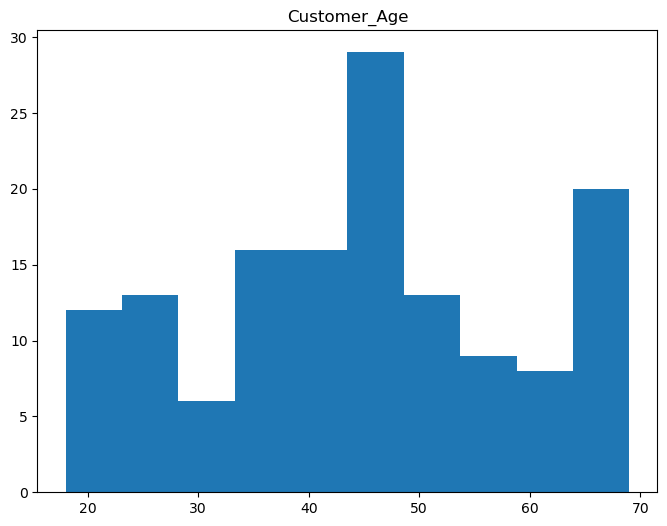

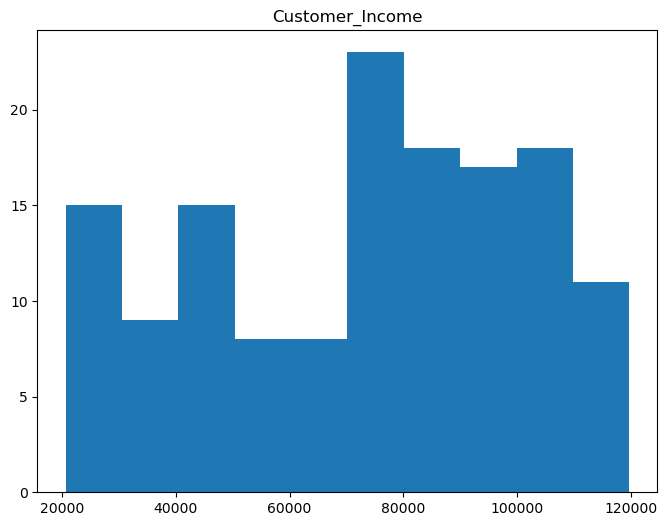

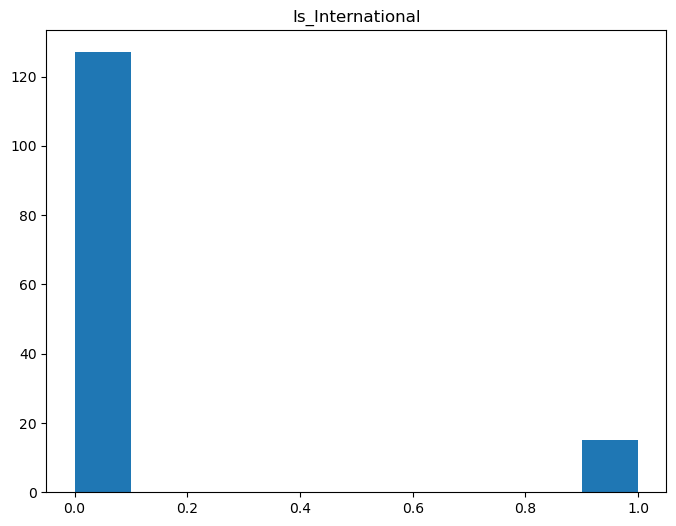

In [311]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], bins=10)
    plt.title(col)
    plt.show()

### Data Cleaning

I will now clean the new dataset to improve data consistency by standardizing and harmonizing the data making it consistent and comparable. Overall I want my data to be reliable and consistent which in turn will lead to a more robust and trustworthy insights and conclusions. I will follow this steps:

Locate any missing values

check for duplicated items

Number of missing data points per column

NaN values will be marked as True

In [312]:
df.isnull()

,Transaction_ID,Customer_ID,Transaction_Amount,Merchant_ID,Merchant_Category,Card_Type,Is_Online,Is_Fraud,Customer_Age,Customer_Gender,Customer_Income,Transaction_City,Device_Type,Is_International
Transaction_Date,,,,,,,,,,,,,,
2022-01-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2022-01-02,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2022-01-03,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2022-01-04,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2022-01-05,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-13,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2022-07-14,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2022-07-17,False,False,False,False,False,False,False,False,False,False,False,False,False,False


How many missing values are there in the dataset?

In [313]:
missing_values_count = df.isnull().sum()
missing_values_count[:]

Transaction_ID        0
Customer_ID           0
Transaction_Amount    0
Merchant_ID           0
Merchant_Category     0
Card_Type             0
Is_Online             0
Is_Fraud              0
Customer_Age          0
Customer_Gender       0
Customer_Income       0
Transaction_City      0
Device_Type           0
Is_International      0
dtype: int64

In [314]:
df.isnull().mean()*100

Transaction_ID        0.0
Customer_ID           0.0
Transaction_Amount    0.0
Merchant_ID           0.0
Merchant_Category     0.0
Card_Type             0.0
Is_Online             0.0
Is_Fraud              0.0
Customer_Age          0.0
Customer_Gender       0.0
Customer_Income       0.0
Transaction_City      0.0
Device_Type           0.0
Is_International      0.0
dtype: float64

In [315]:
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

In [316]:
total_missing

0

We have 351 missing values.

I will vizualize the percentage in each column

In [317]:
percentage_missing = (round(df.isnull().  sum() * 100/ len(df),2).sort_values(ascending=False))
display(pd.DataFrame({'Missing Percentage' :percentage_missing}));

,Missing Percentage
Transaction_ID,0.0
Customer_ID,0.0
Transaction_Amount,0.0
Merchant_ID,0.0
Merchant_Category,0.0
Card_Type,0.0
Is_Online,0.0
Is_Fraud,0.0
Customer_Age,0.0
Customer_Gender,0.0


We can see the missing values percentage by column in a descending manner:

Merchant_ID	20%

Transaction_Amount	19%

Merchant_Category	19%

Card_Type	19%

Customer_ID	18.5%

Is_Online	10%

Is_Fraud	10%

Customer_Age	10%

Customer_Gender	10%

Customer_Income	10%

Transaction_City	10%

Device_Type	10%

Is_International	10%

Transaction_ID	0.0

Transaction_Date	0.0


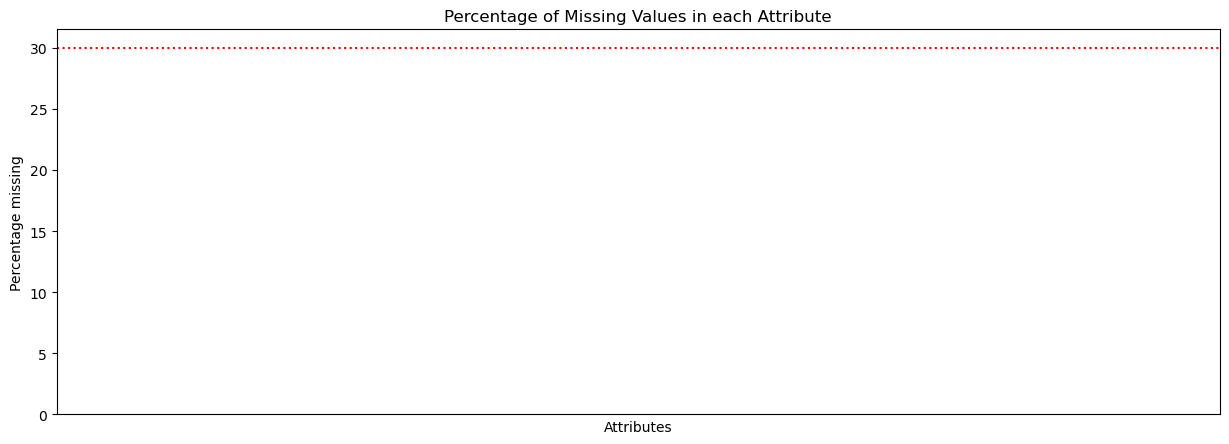

In [318]:
fig, ax = plt.subplots(figsize=(15,5))
threshold = 30

missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0,ascending = False )

ax.bar(missing.index, missing.values.T[0])
plt.title("Percentage of Missing Values in each Attribute")
plt.xticks([])
plt.xlabel("Attributes")
plt.ylabel("Percentage missing")
plt.axhline(threshold, color='red', ls='dotted')
plt.show()

Lets now visualize the percentage of data missing for each feature

In [319]:
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(df)

,Total,Percent
Transaction_ID,0,0.0
Customer_ID,0,0.0
Transaction_Amount,0,0.0
Merchant_ID,0,0.0
Merchant_Category,0,0.0
Card_Type,0,0.0
Is_Online,0,0.0
Is_Fraud,0,0.0
Customer_Age,0,0.0
Customer_Gender,0,0.0


### Replacing missing values

I will now replace missing values in quantitative data with the mean

In [320]:
df['Transaction_Amount'].fillna(df['Transaction_Amount'].mean(), inplace=True)
df['Customer_Age'].fillna(df['Customer_Age'].mean(), inplace=True)
df['Customer_Income'].fillna(df['Customer_Income'].mean(), inplace=True)

In [321]:
df.isnull().sum()

Transaction_ID        0
Customer_ID           0
Transaction_Amount    0
Merchant_ID           0
Merchant_Category     0
Card_Type             0
Is_Online             0
Is_Fraud              0
Customer_Age          0
Customer_Gender       0
Customer_Income       0
Transaction_City      0
Device_Type           0
Is_International      0
dtype: int64

I will now remove the remaining null values in Qualitative data.

Due to small size of dataset I will use KNN imputation. Meaning that my approach to dealing with missing values will be to use KNN Imputer from sklearn library.

This technique will replace the missing values in our categorical features with the average of the values from the neareast neighbours or the similar datapoints.

In [322]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

In [323]:
categorical_cols = df.select_dtypes(include=['object']).columns

In [324]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  
    label_encoders[col] = le

In [325]:
imputer_cat = KNNImputer(n_neighbors=5)
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

In [326]:
for col, le in label_encoders.items():
    df[col] = le.inverse_transform(df[col].astype(int))

print(df)

                 Transaction_ID Customer_ID  Transaction_Amount Merchant_ID  \
Transaction_Date                                                              
2022-01-01                T0001        C001         1878.955193        M001   
2022-01-02                T0002        C002         4754.064389         nan   
2022-01-03                T0003        C003         3662.649770        M003   
2022-01-04                T0004        C004         2997.305836        M004   
2022-01-05                T0005         nan          788.533016        M005   
...                         ...         ...                 ...         ...   
2022-07-13                T0194         nan         3169.176272         nan   
2022-07-14                T0195        C045         1701.758657         nan   
2022-07-17                T0198        C048         2483.627917        M018   
2022-07-18                T0199         nan         4436.561257        M019   
2022-07-19                T0200        C050         

In [327]:
df.isnull().sum()

Transaction_ID        0
Customer_ID           0
Transaction_Amount    0
Merchant_ID           0
Merchant_Category     0
Card_Type             0
Is_Online             0
Is_Fraud              0
Customer_Age          0
Customer_Gender       0
Customer_Income       0
Transaction_City      0
Device_Type           0
Is_International      0
dtype: int64

In [328]:
df.shape

(142, 14)

I will drop the remaining missing values from Is_Online, Is_fraud and Is_International

In [329]:
df.dropna(inplace=True)  
df.isnull().sum()   

Transaction_ID        0
Customer_ID           0
Transaction_Amount    0
Merchant_ID           0
Merchant_Category     0
Card_Type             0
Is_Online             0
Is_Fraud              0
Customer_Age          0
Customer_Gender       0
Customer_Income       0
Transaction_City      0
Device_Type           0
Is_International      0
dtype: int64

In [330]:
df.shape

(142, 14)

### Detecting Outliers

An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it's a good idea to remove them. The outlier detection and removing that I am going to perform is called IQR score technique. The IQR method is used to calculate the lower and upper bounds for outliers.The code then prints the rows that have outliers, according to the IQR method. Often outliers can be seen with visualizations using a box plot.

I will first look for outliers in numerical dataset

### Boxplots

<Axes: xlabel='Transaction_Amount'>

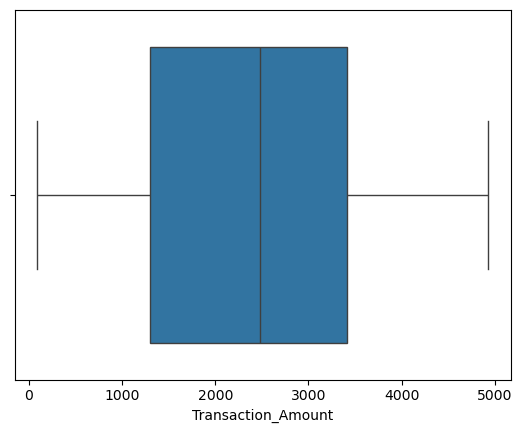

In [331]:
sns.boxplot(x=df['Transaction_Amount'])

<Axes: xlabel='Customer_Age'>

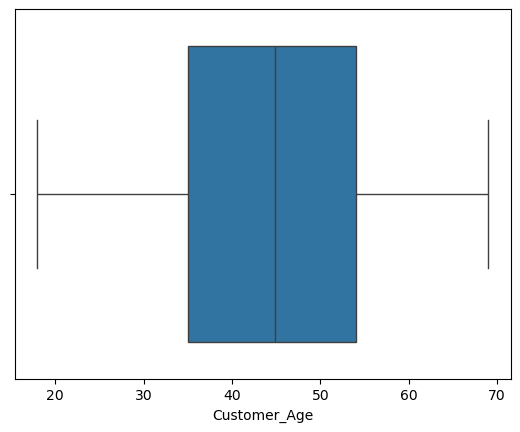

In [332]:
sns.boxplot(x=df['Customer_Age'])

<Axes: xlabel='Customer_Income'>

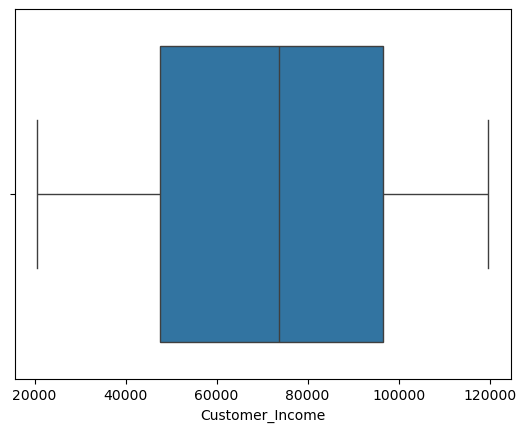

In [333]:
sns.boxplot(x=df['Customer_Income'])

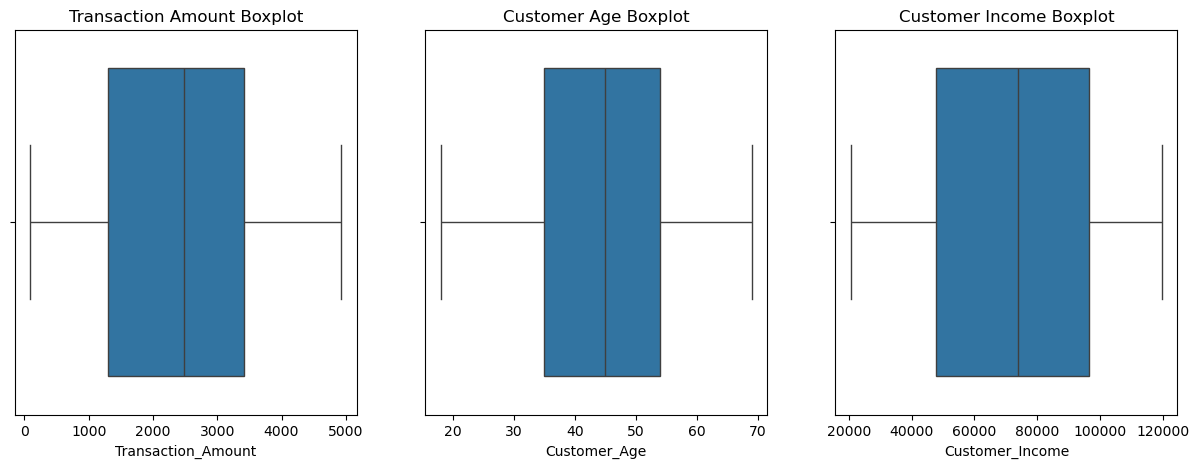

In [334]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x=df['Transaction_Amount'])
plt.title('Transaction Amount Boxplot')

plt.subplot(1, 3, 2)
sns.boxplot(x=df['Customer_Age'])
plt.title('Customer Age Boxplot')

plt.subplot(1, 3, 3)
sns.boxplot(x=df['Customer_Income'])
plt.title('Customer Income Boxplot')

plt.show()

In [335]:
Q1 = df['Transaction_Amount'].quantile(0.25)
Q3 = df['Transaction_Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_transaction = df[(df['Transaction_Amount'] < lower_bound) | (df['Transaction_Amount'] > upper_bound)]
print("\nOutliers in Transaction_Amount (IQR):\n", outliers_transaction)


Outliers in Transaction_Amount (IQR):
 Empty DataFrame
Columns: [Transaction_ID, Customer_ID, Transaction_Amount, Merchant_ID, Merchant_Category, Card_Type, Is_Online, Is_Fraud, Customer_Age, Customer_Gender, Customer_Income, Transaction_City, Device_Type, Is_International]
Index: []


In [336]:
Q1_income = df['Customer_Income'].quantile(0.25)
Q3_income = df['Customer_Income'].quantile(0.75)
IQR_income = Q3_income - Q1_income
lower_bound_income = Q1_income - 1.5 * IQR_income
upper_bound_income = Q3_income + 1.5 * IQR_income
outliers_income = df[(df['Customer_Income'] < lower_bound_income) | (df['Customer_Income'] > upper_bound_income)]
print("\nOutliers in Customer_Income (IQR):\n", outliers_income)


Outliers in Customer_Income (IQR):
 Empty DataFrame
Columns: [Transaction_ID, Customer_ID, Transaction_Amount, Merchant_ID, Merchant_Category, Card_Type, Is_Online, Is_Fraud, Customer_Age, Customer_Gender, Customer_Income, Transaction_City, Device_Type, Is_International]
Index: []


### Histograms for numerical columns

The following Histograms visualize the distribution of numerical columns ('Transaction_Amount', 'Customer_Age', 'Customer_Income').

dropna() will be used to exclude missing values from the plots.

kde=True adds a kernel density estimation line.

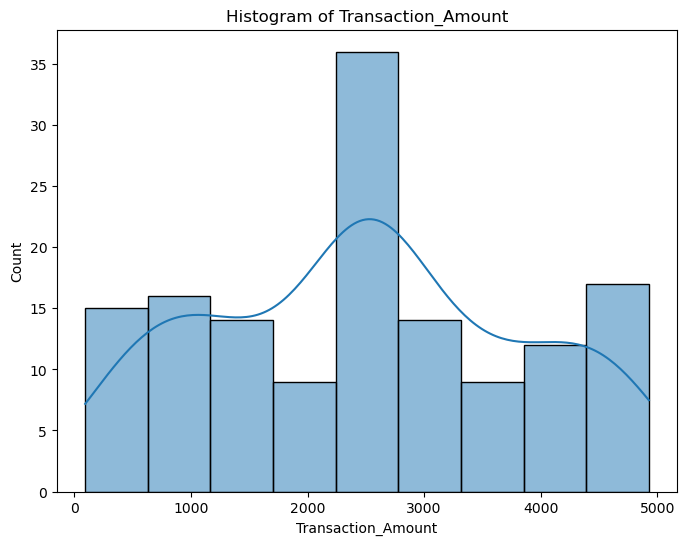

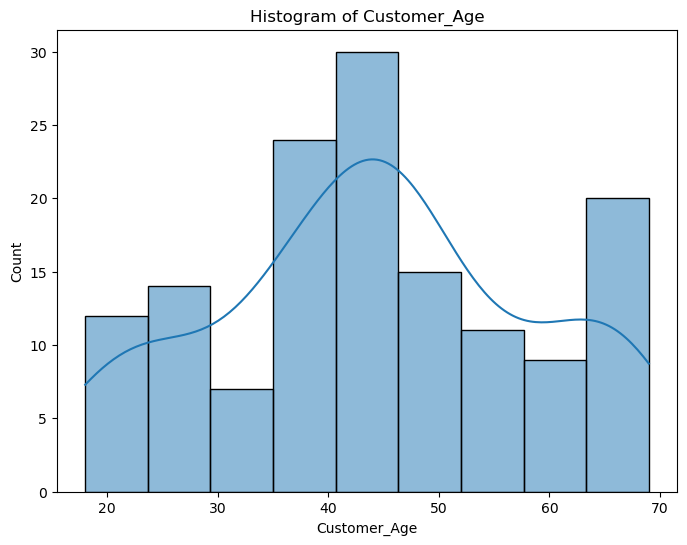

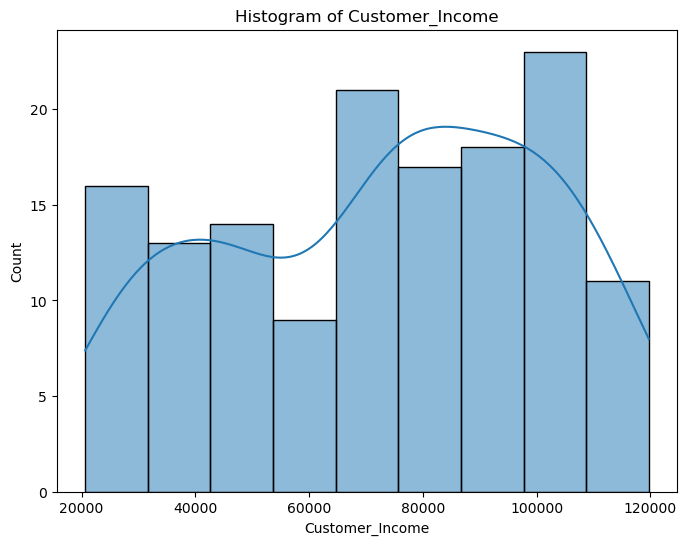

In [337]:
numerical_cols = ['Transaction_Amount', 'Customer_Age', 'Customer_Income']
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col].dropna(), kde=True)  
    plt.title(f'Histogram of {col}')
    plt.show()

Count plots for categorical columns

The Count plots will be used to visualize the frequency of each category in categorical columns ('Merchant_Category',
 'Card_Type',
 'Is_Online',
 'Is_Fraud',
 'Customer_Gender',
 'Transaction_City',
 'Device_Type',
 'Is_International').

This code was used for better readability: plt.xticks(rotation=45, ha='right')

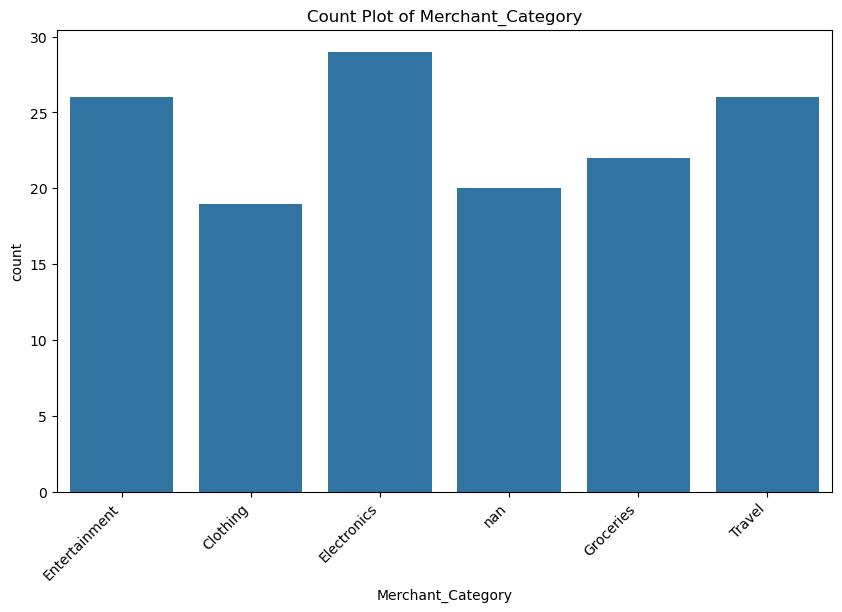

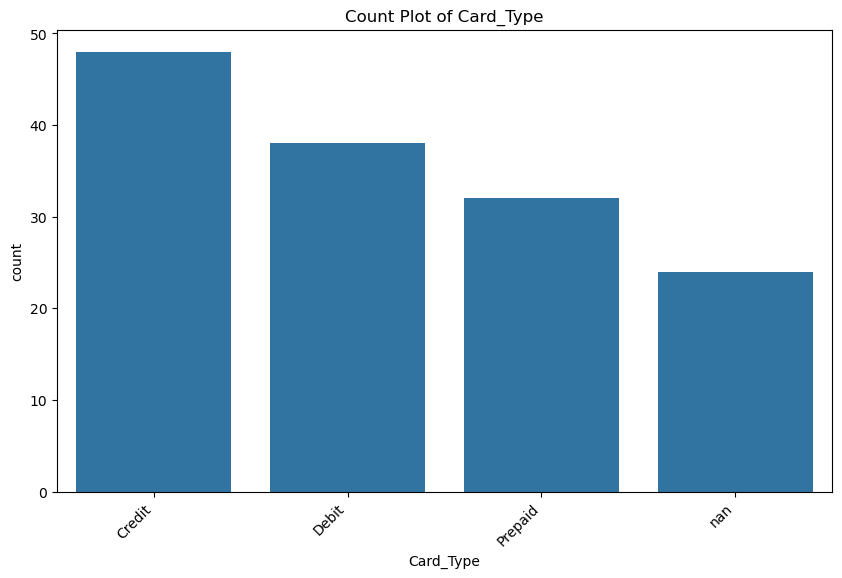

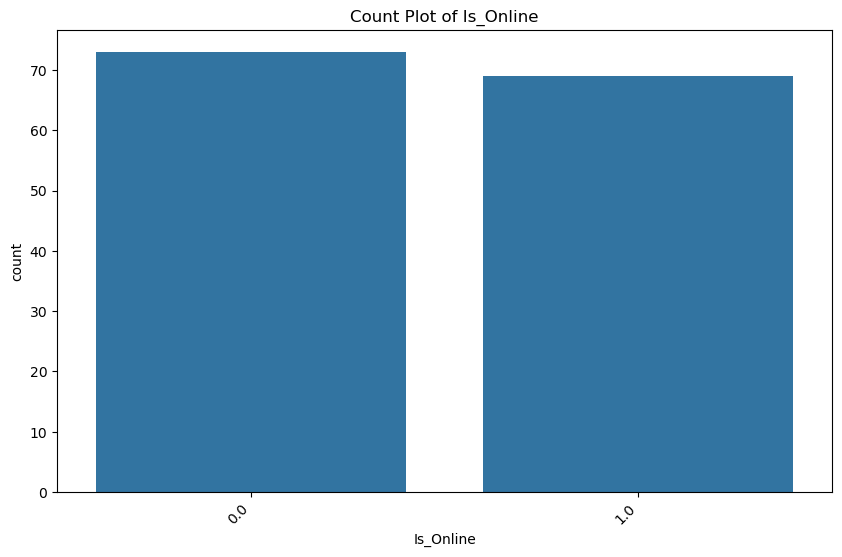

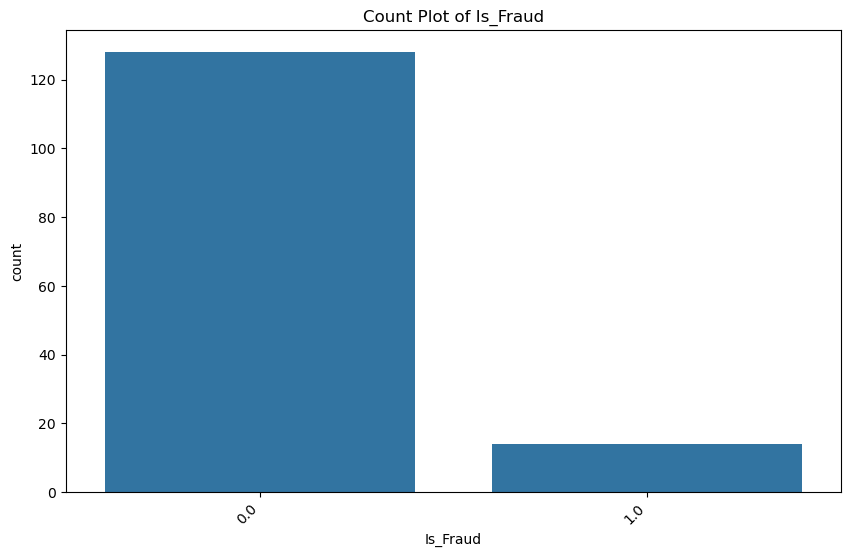

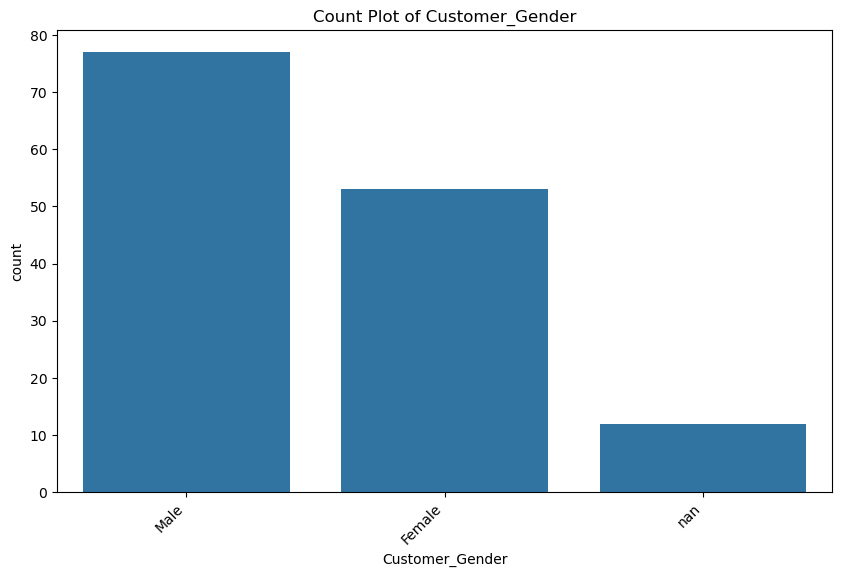

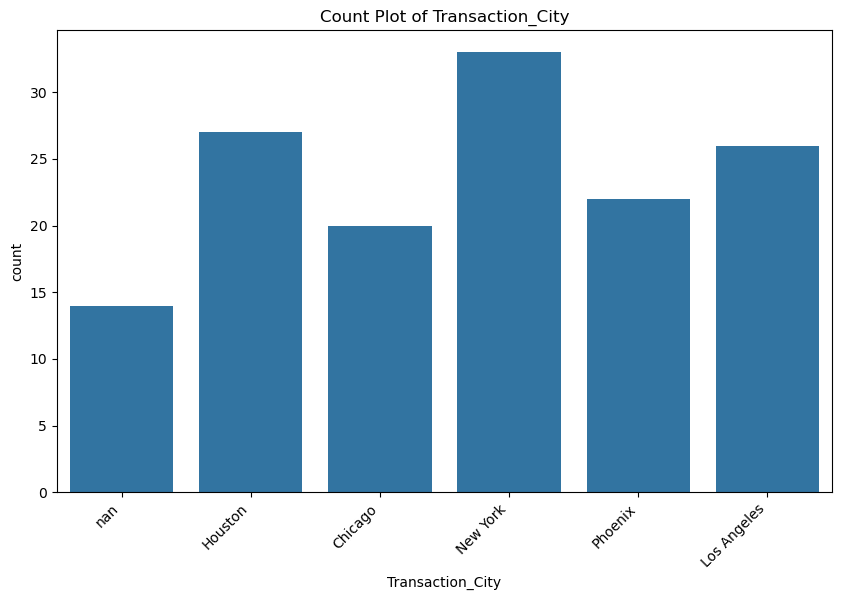

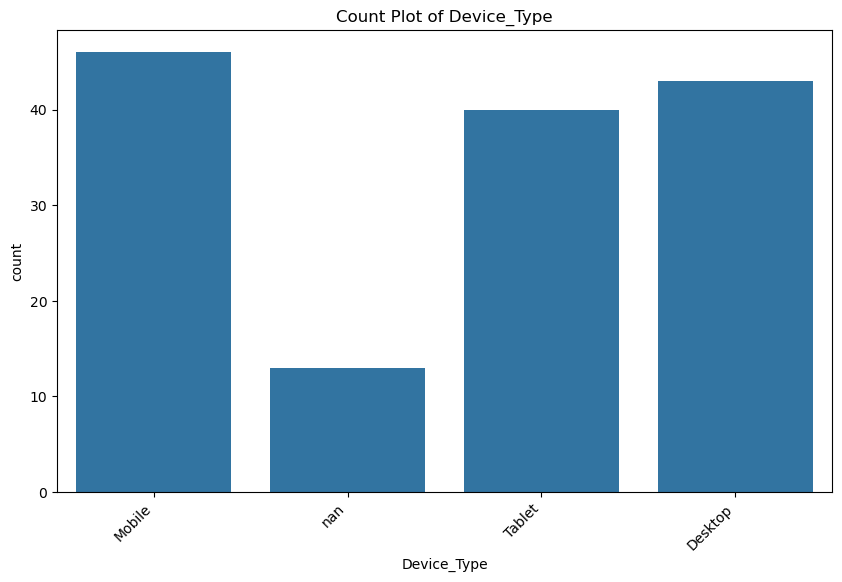

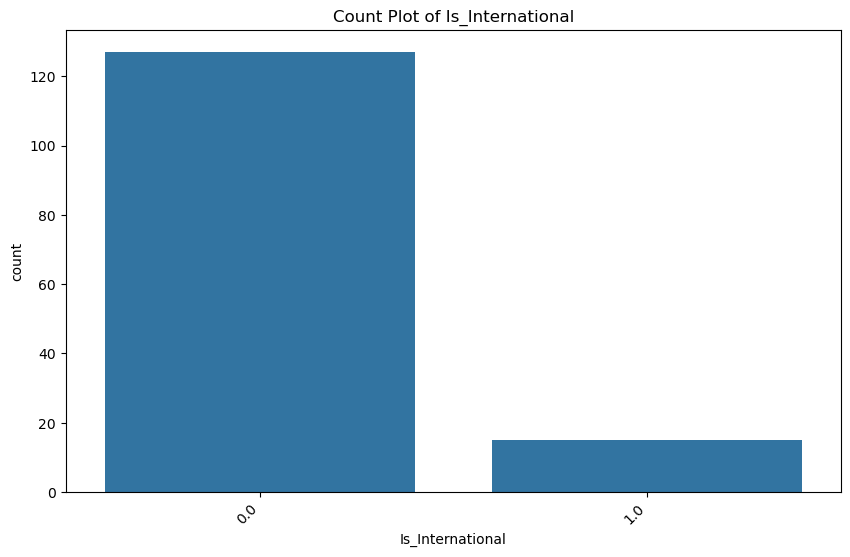

In [338]:
categorical_cols = ['Merchant_Category', 'Card_Type', 'Is_Online', 'Is_Fraud', 'Customer_Gender', 'Transaction_City', 'Device_Type', 'Is_International']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[col])
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45, ha='right')  
    plt.show()

### Investigate Monthly transactions

I am curious to understand monthly transactions in my dataset

So I will further analyse monthly transactions.

First I will resample the data to monthly frequency, will continue by visualizing the sum and count by plotting a line plot.

In [339]:
monthly_transactions = df['Transaction_Amount'].resample('M').sum()
print(monthly_transactions)

Transaction_Date
2022-01-31    62030.071227
2022-02-28    44269.844360
2022-03-31    57397.321802
2022-04-30    54101.944042
2022-05-31    42187.662658
2022-06-30    56587.684086
2022-07-31    35981.339486
Freq: M, Name: Transaction_Amount, dtype: float64


I will now see the monthly transactions sum

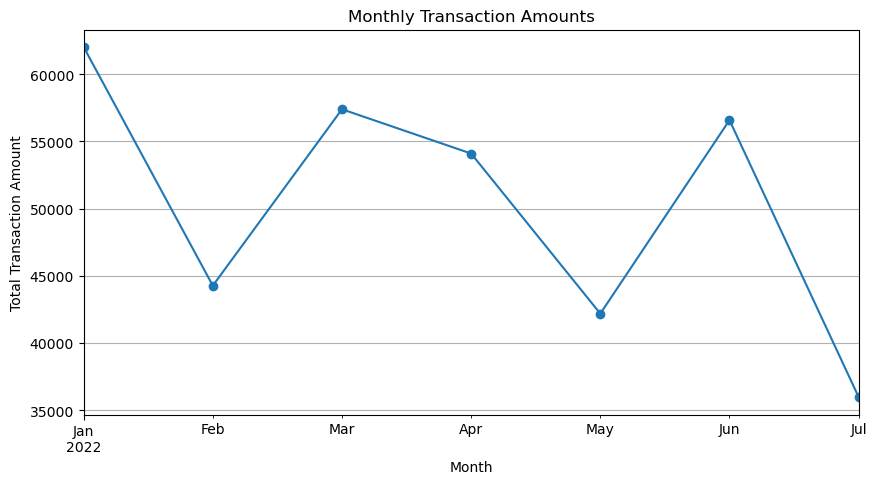

In [340]:
plt.figure(figsize=(10, 5))
monthly_transactions.plot(kind='line', marker='o')
plt.title('Monthly Transaction Amounts')
plt.xlabel('Month')
plt.ylabel('Total Transaction Amount')
plt.grid(True)
plt.show()

I will now count the monthly transaction sum

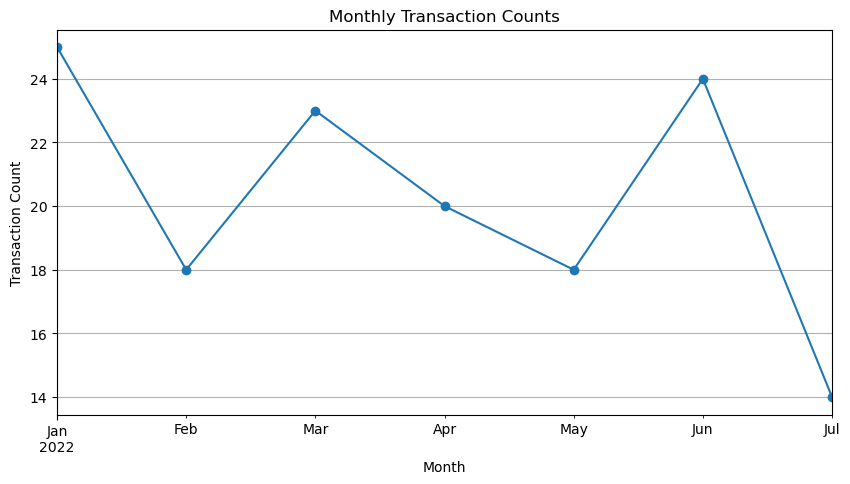

In [341]:
monthly_counts = df['Transaction_ID'].resample('M').count()

plt.figure(figsize=(10,5))
monthly_counts.plot(kind='line', marker='o')
plt.title('Monthly Transaction Counts')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.grid(True)
plt.show()